In [168]:
import pandas as pd
import seaborn as sns

In [169]:
df = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/marketing/nyt1.csv")
df.shape

(458441, 5)

In [170]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [172]:
df.isnull().sum()

,0
Age,0
Gender,0
Impressions,0
Clicks,0
Signed_In,0


In [173]:
df.duplicated().sum()

np.int64(453503)

In [174]:
df.columns = [col.lower() for col in df]
df

,age,gender,impressions,clicks,signed_in
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [175]:
df.describe()

,age,gender,impressions,clicks,signed_in
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [176]:
bins = [0, 18, 25, 35, 45, 55, 65, 110]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df.age, bins, labels = labels, include_lowest = True)
df

,age,gender,impressions,clicks,signed_in,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458436,0,0,2,0,0,<18
458437,0,0,4,0,0,<18
458438,72,1,5,0,1,65+
458439,0,0,5,0,0,<18


<Axes: xlabel='age_group', ylabel='count'>

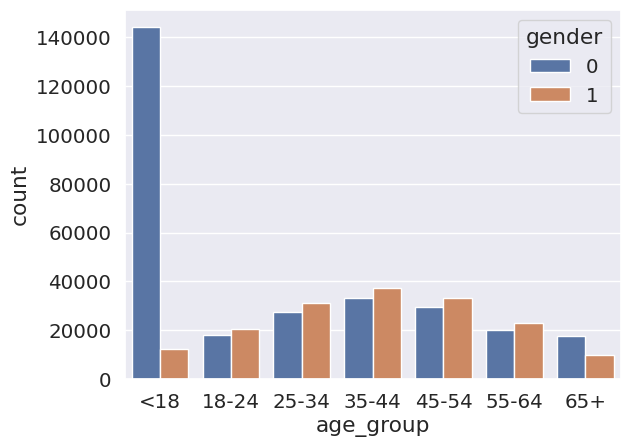

In [177]:
sns.countplot(x='age_group', hue='gender', data=df)

<Axes: xlabel='clicks', ylabel='count'>

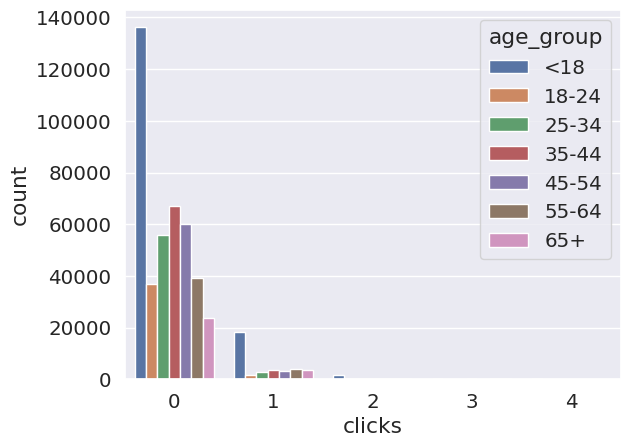

In [178]:
sns.countplot(x='clicks', hue='age_group', data=df)

In [179]:
df[(df['clicks']>0) & (df['impressions']==0)]

,age,gender,impressions,clicks,signed_in,age_group


<Axes: xlabel='impressions', ylabel='Count'>

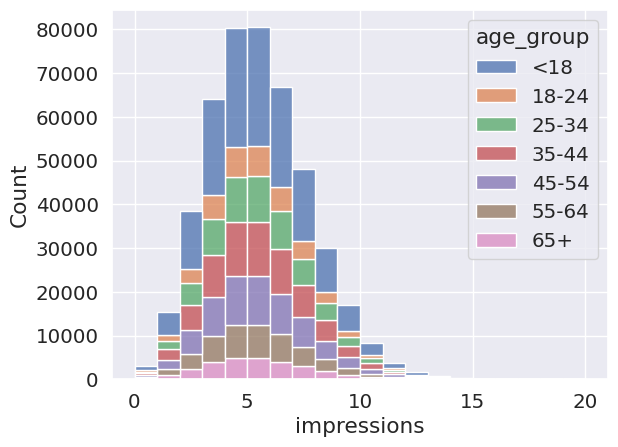

In [180]:
sns.histplot(df, x='impressions', hue='age_group', stat='count', binwidth=1, multiple='stack')

<Axes: xlabel='age_group', ylabel='impressions'>

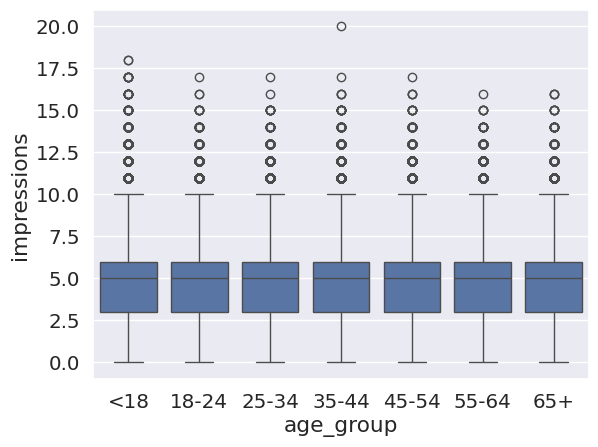

In [181]:
sns.boxplot(y=df['impressions'], x=df['age_group'])

In [182]:
df['CTR'] = round(df['clicks']/df['impressions'], 5)

<Axes: xlabel='age_group', ylabel='CTR'>

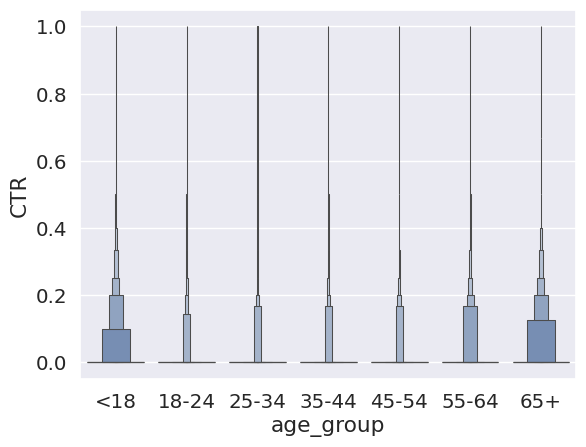

In [183]:
sns.boxenplot(x=df['age_group'], y = df['CTR'])

In [184]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ['0', '<10%', '10%-20%', '20%-40%', '>40%']
df['CTR_group'] = pd.cut(df.CTR, bins, labels = labels)
df.CTR_group.value_counts(normalize=True, sort=True)

,proportion
CTR_group,
0,0.912516
10%-20%,0.054654
20%-40%,0.023328
<10%,0.004996
>40%,0.004506


In [185]:
df_Clicked = df[df['CTR'] > 0]
df_Clicked.head()

,age,gender,impressions,clicks,signed_in,age_group,CTR,CTR_group
5,47,0,11,1,1,45-54,0.09091,<10%
6,0,0,7,1,0,<18,0.14286,10%-20%
10,0,0,8,1,0,<18,0.12500,10%-20%
39,0,0,7,2,0,<18,0.28571,20%-40%
63,0,0,2,1,0,<18,0.50000,>40%


In [186]:
df_Clicked.shape

(39838, 8)

In [187]:
df_Clicked.age_group.value_counts(normalize=True)

,proportion
age_group,
<18,0.505723
55-64,0.106757
65+,0.099152
35-44,0.090190
45-54,0.079397
25-34,0.073297
18-24,0.045484


<Axes: xlabel='age_group', ylabel='CTR'>

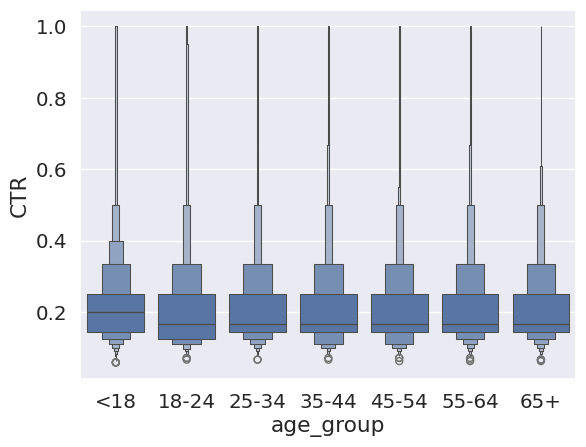

In [188]:
sns.boxenplot(x = df_Clicked['age_group'], y = df_Clicked['CTR'])

<Axes: xlabel='age_group', ylabel='count'>

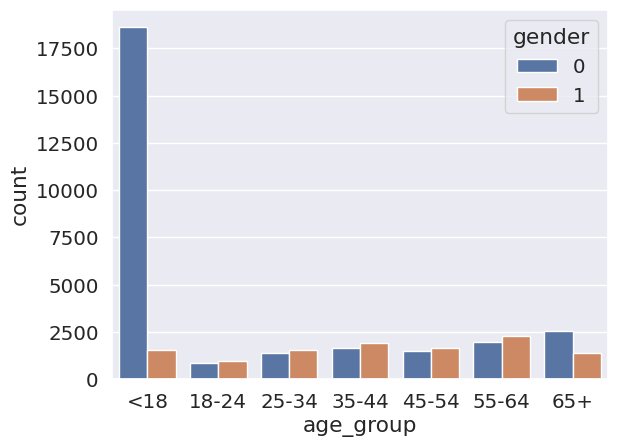

In [189]:
sns.countplot(x='age_group', hue='gender', data=df_Clicked)

<Axes: xlabel='age_group', ylabel='count'>

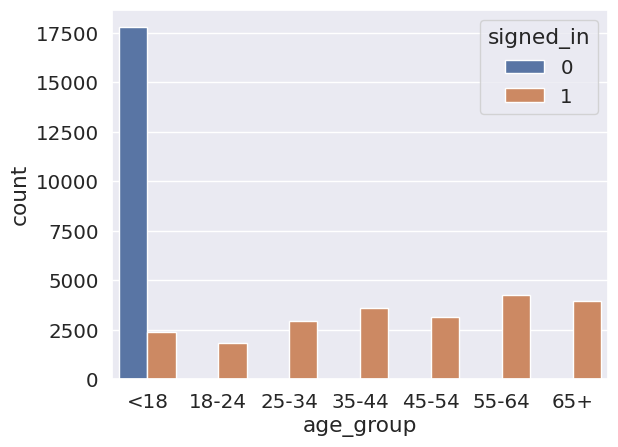

In [190]:
sns.countplot(x='age_group', hue='signed_in', data=df_Clicked)

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('/content/drive/MyDrive/AI/Data Analysis/marketing/Bank_marketing_compaign.csv')
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [194]:
null_value_percentage = (df.isnull().sum()/df.shape[0])*100
null_value_percentage.sort_values(ascending = False)

,0
days_since_prev_campaign_contact,81.622271
customer_age,1.955952
balance,1.260783
last_contact_duration,0.982716
marital,0.473979
personal_loan,0.470819
num_contacts_in_campaign,0.353904
id,0.000000
default,0.000000
job_type,0.000000


In [195]:
df.nunique()

,0
id,31647
customer_age,77
job_type,12
marital,3
education,4
default,2
balance,6563
housing_loan,2
personal_loan,2
communication_type,3


In [196]:
df.duplicated().sum()

np.int64(0)

In [197]:
cat_cols = [df.columns[i]
            for i in range(1, df.shape[1]-1)
            if df.iloc[:,i].dtype=='O']
cat_cols

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

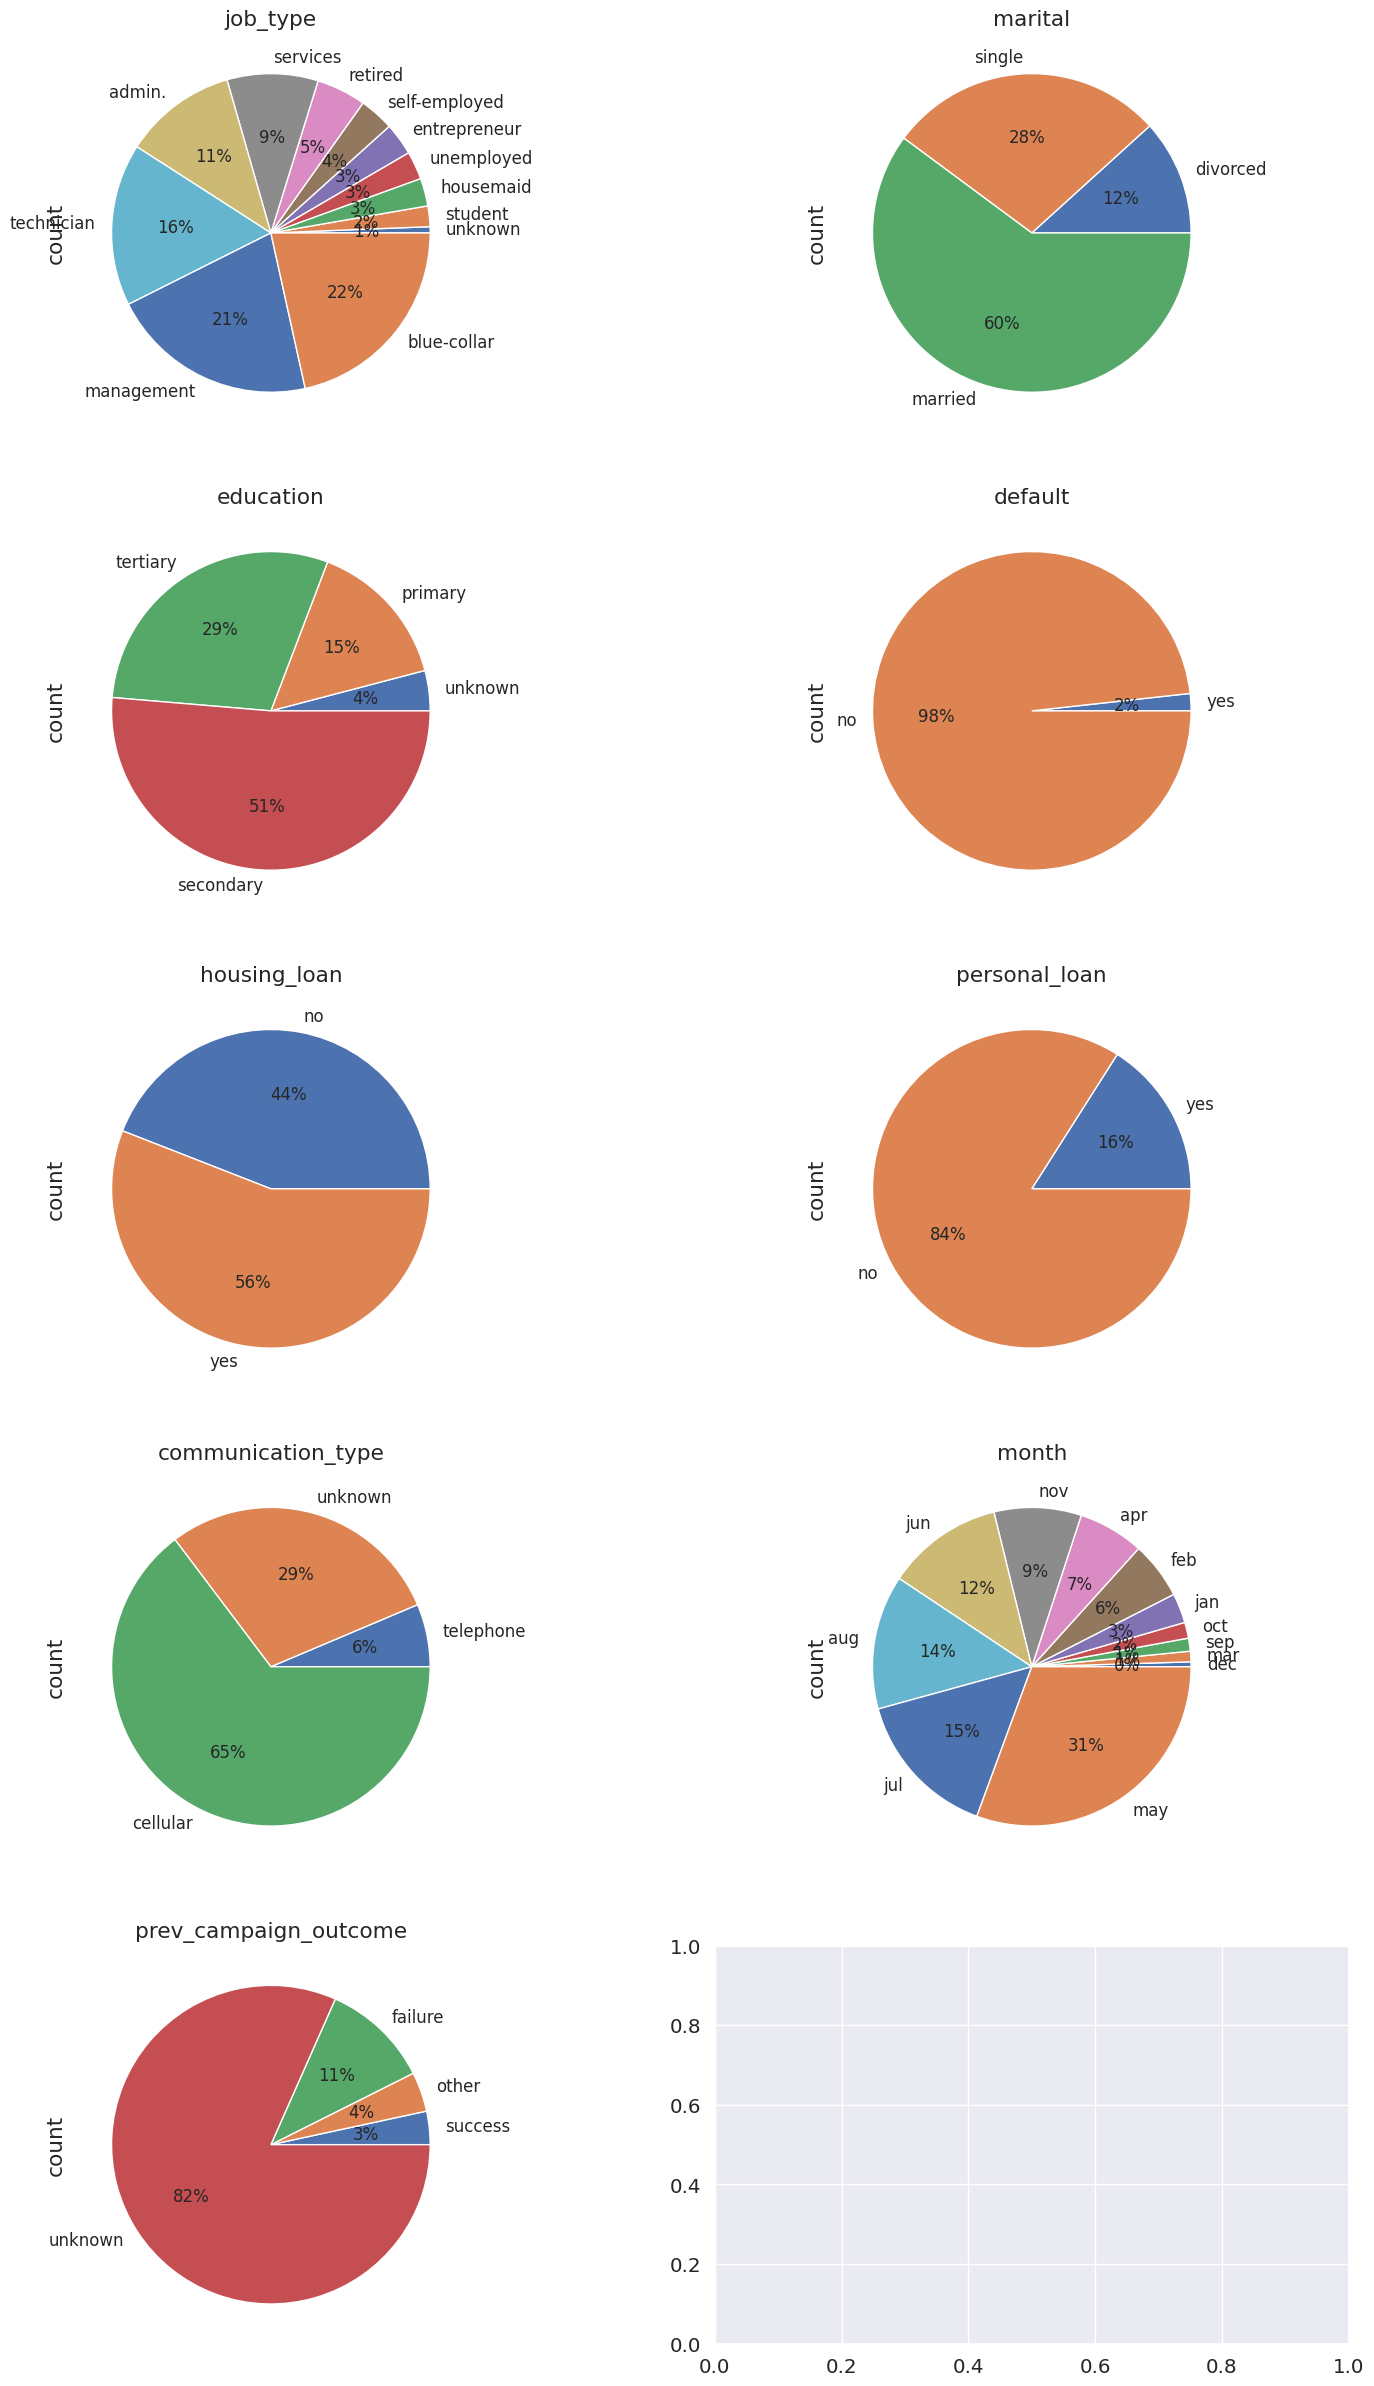

In [198]:
fig, axes = plt.subplots(5, 2, figsize=(18, 30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, column in enumerate(df[cat_cols]):
    df[column].value_counts()[::-1].plot(kind='pie', ax=axes[i], title=column, autopct='%.0f%%', fontsize=12)

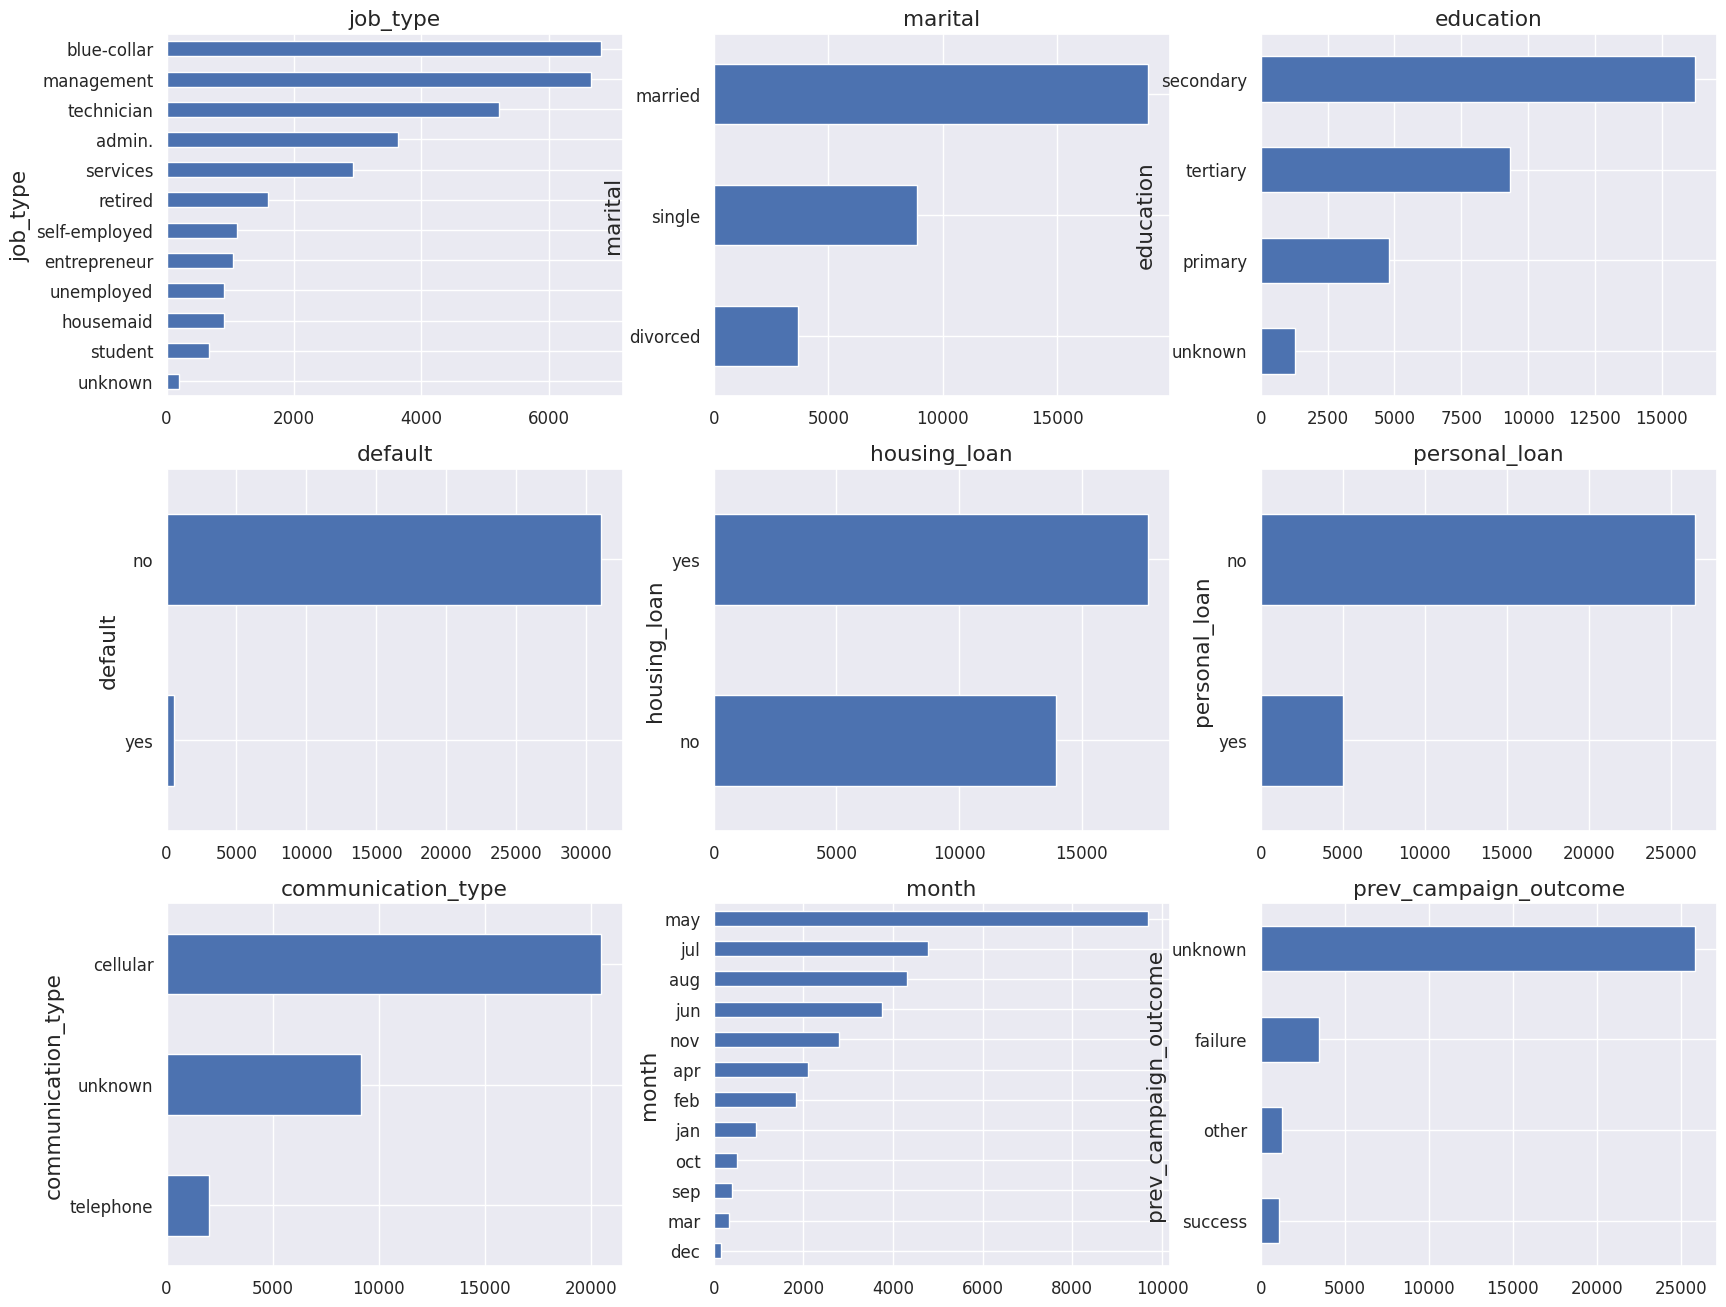

In [199]:
fig, axes = plt.subplots(3, 3, figsize=(20,16))

axes = [ax for axes_rows in axes for ax in axes_rows]

for i, column in enumerate(df[cat_cols]):
    df[column].value_counts()[::-1].plot(kind='barh', ax=axes[i], title=column, fontsize=12)

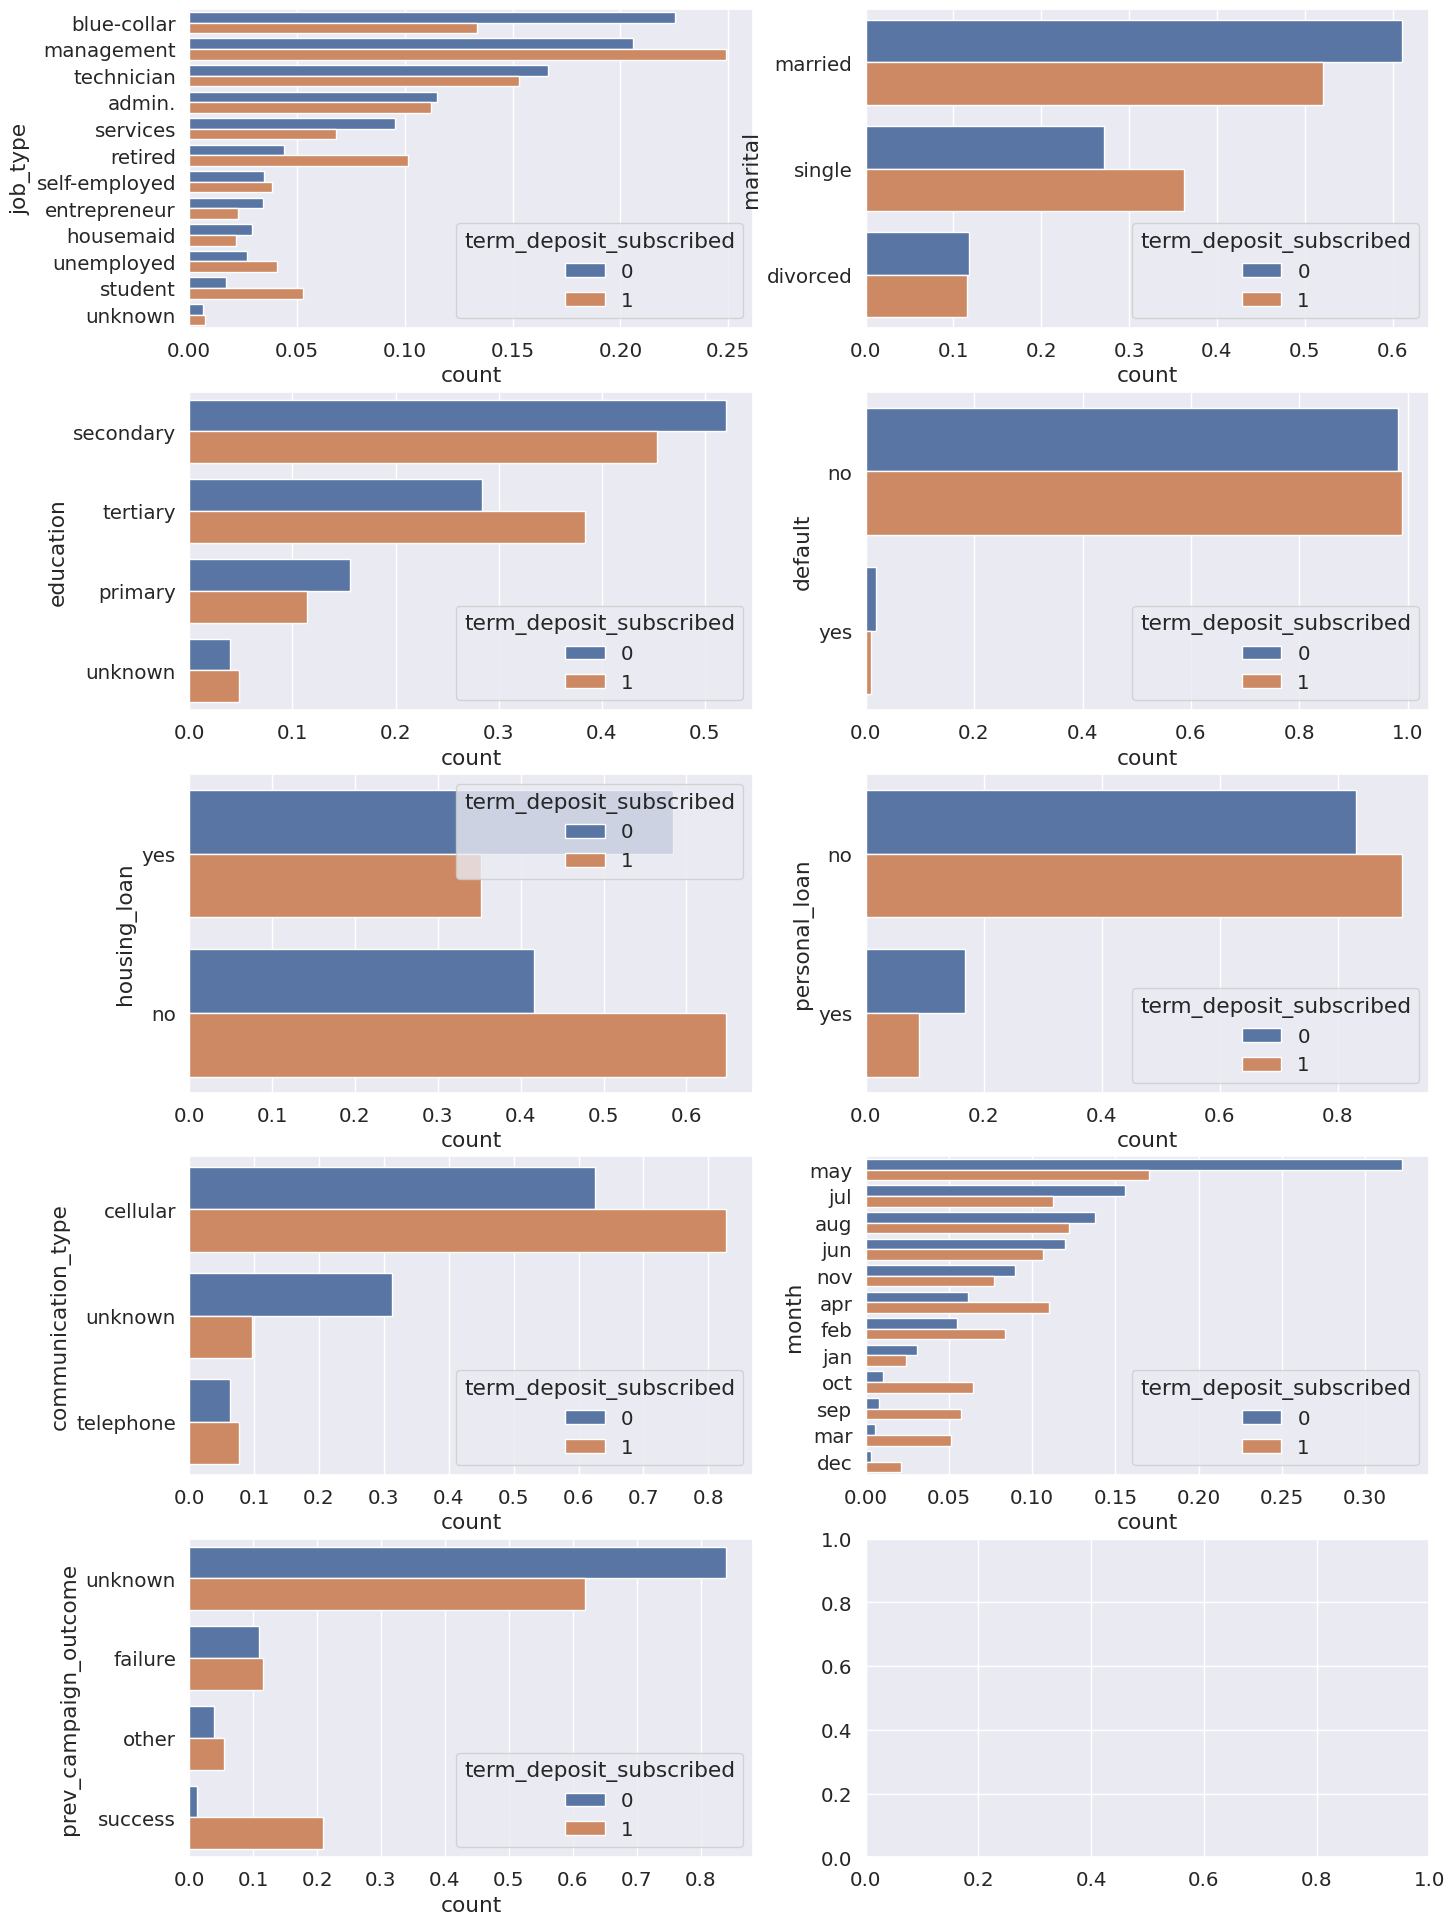

In [200]:
fig, axes = plt.subplots(5, 2, figsize=(16, 24))

axes = [ax for axes_rows in axes for ax in axes_rows]

target_col = 'term_deposit_subscribed'

for i, column in enumerate(df[cat_cols]):

    fltr = df[target_col] == 0

    vc_a = df[fltr][column].value_counts(normalize=True).reset_index()
    vc_a.columns = [column, 'count']

    vc_b = df[~fltr][column].value_counts(normalize=True).reset_index()
    vc_b.columns = [column, 'count']

    vc_a[target_col] = 0
    vc_b[target_col] = 1

    result = pd.concat([vc_a, vc_b]).reset_index(drop=True)

    sns.barplot(y=column, x='count', data=result, hue=target_col, ax=axes[i])


In [201]:
features = [c for c in df.columns if c not in ['id', 'term_deposit_subscribed']]
num_cols = [c for c in features if c not in cat_cols]
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

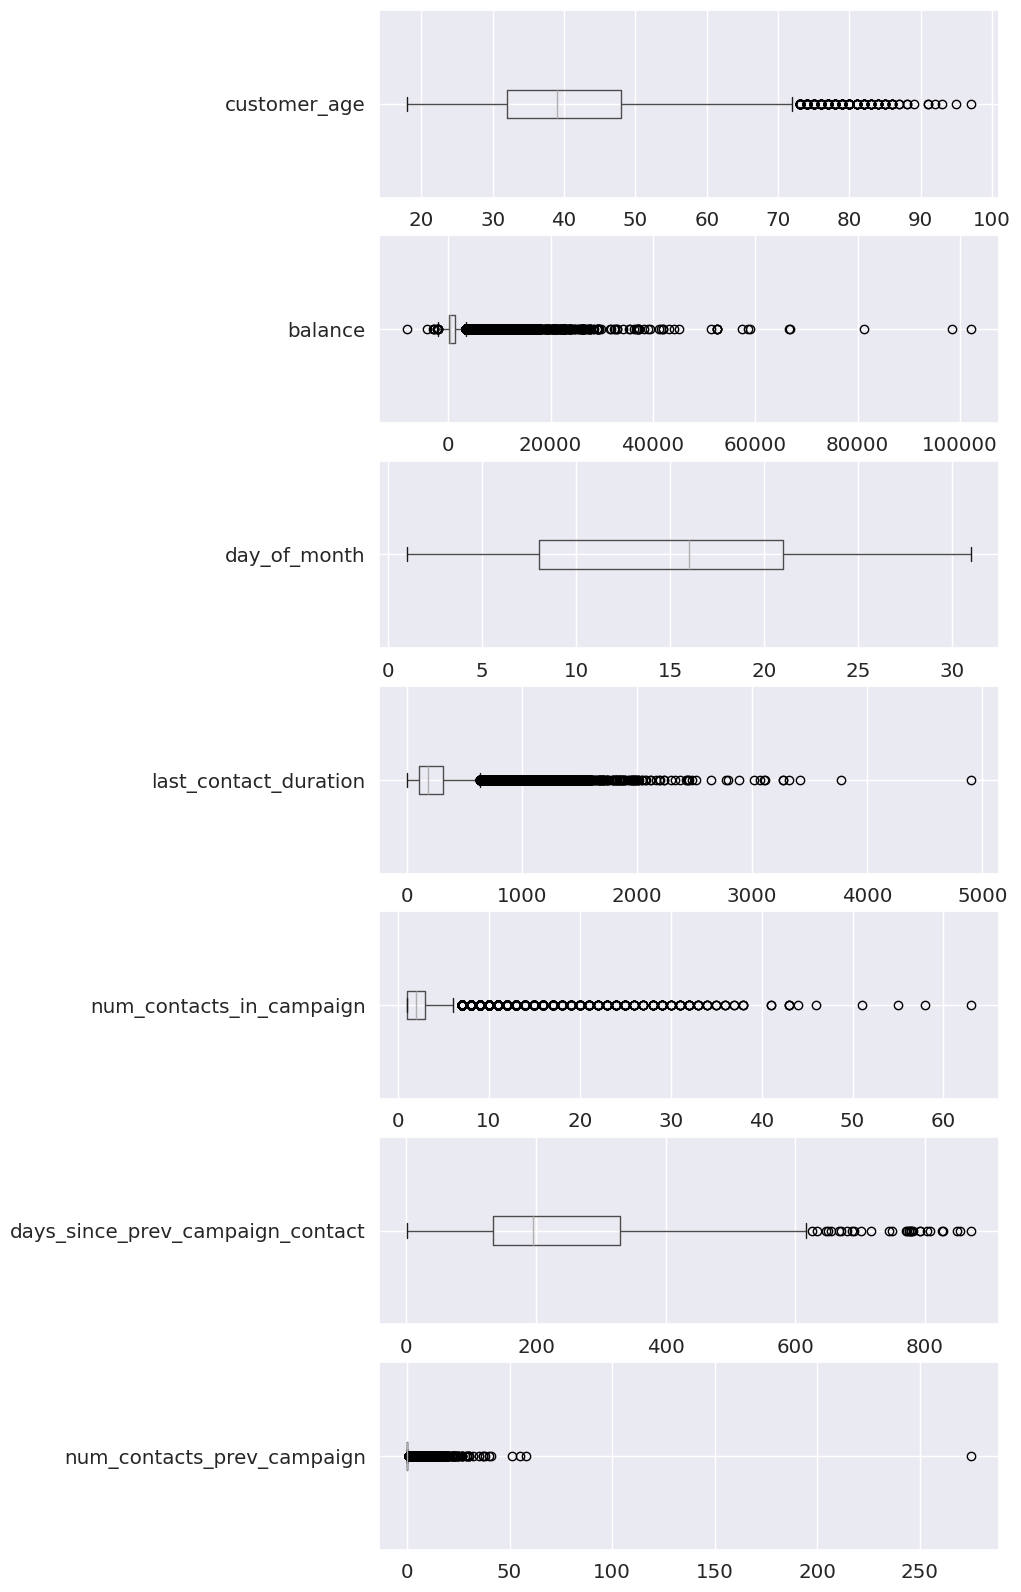

In [202]:
fig, axes = plt.subplots(7, 1, figsize=(8,20))
for i, c in enumerate(df[num_cols]):
    df[[c]].boxplot(ax=axes[i], vert=False)

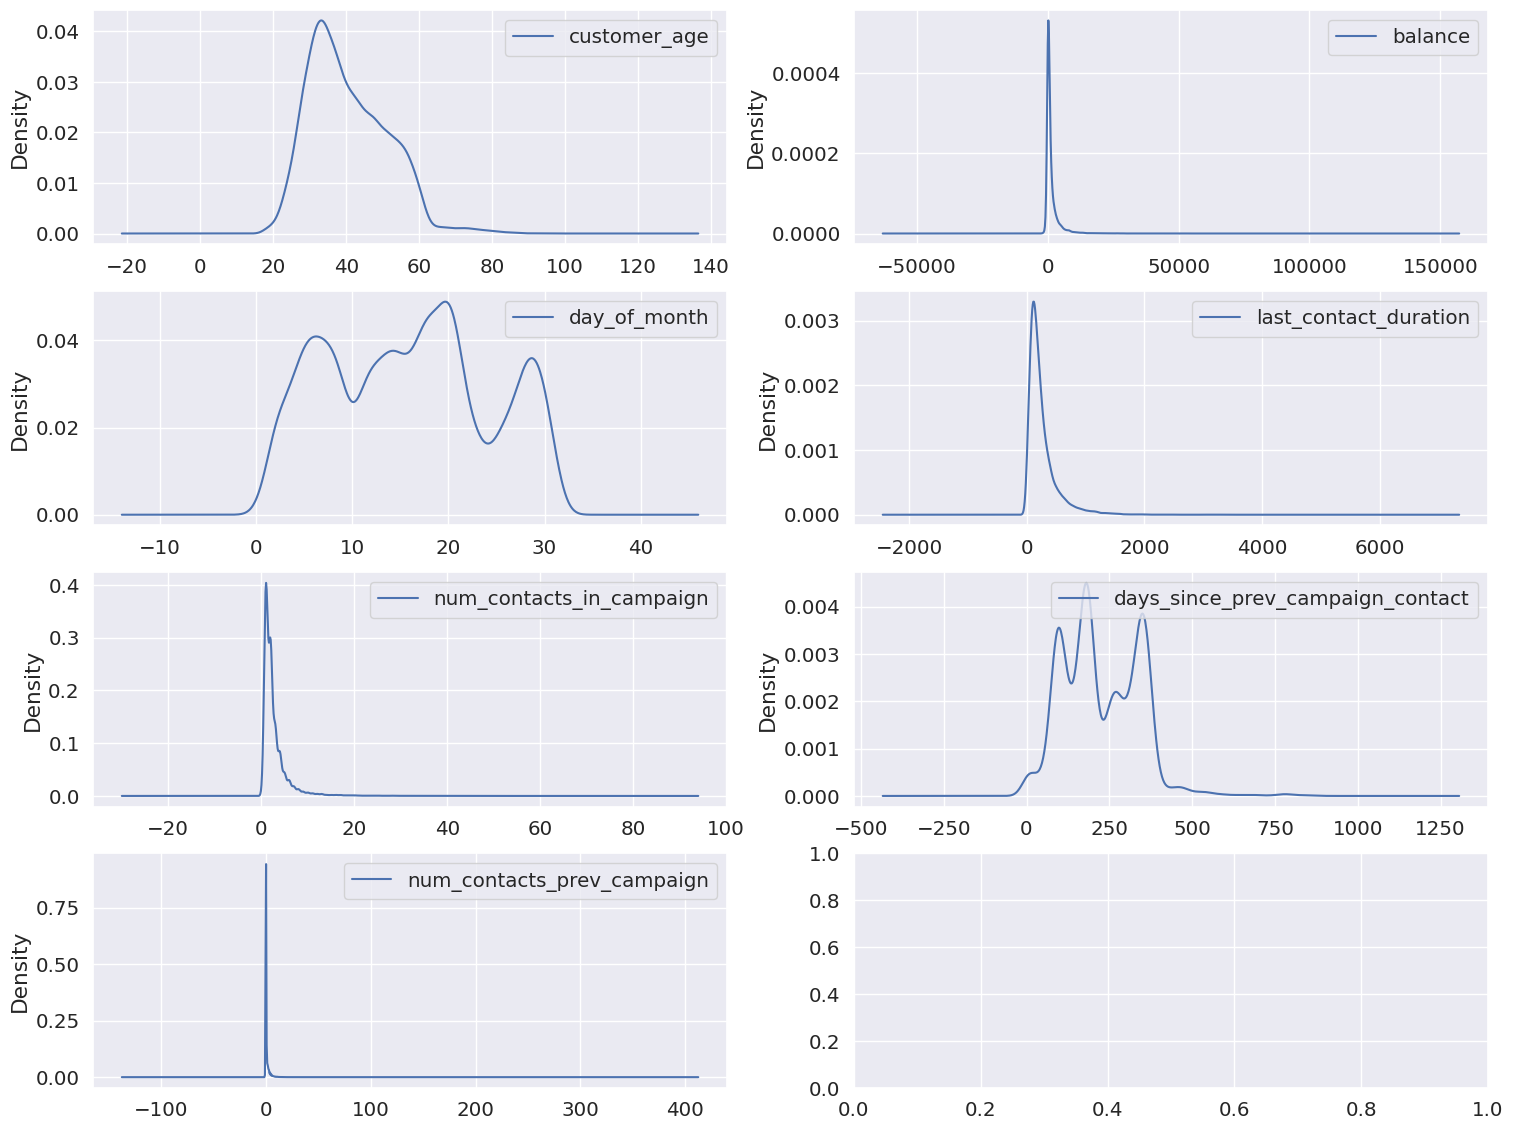

In [203]:
fig, axes = plt.subplots(4, 2, figsize=(18,14))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(num_cols):
    plot = df[[c]].plot(kind='kde', ax=axes[i])

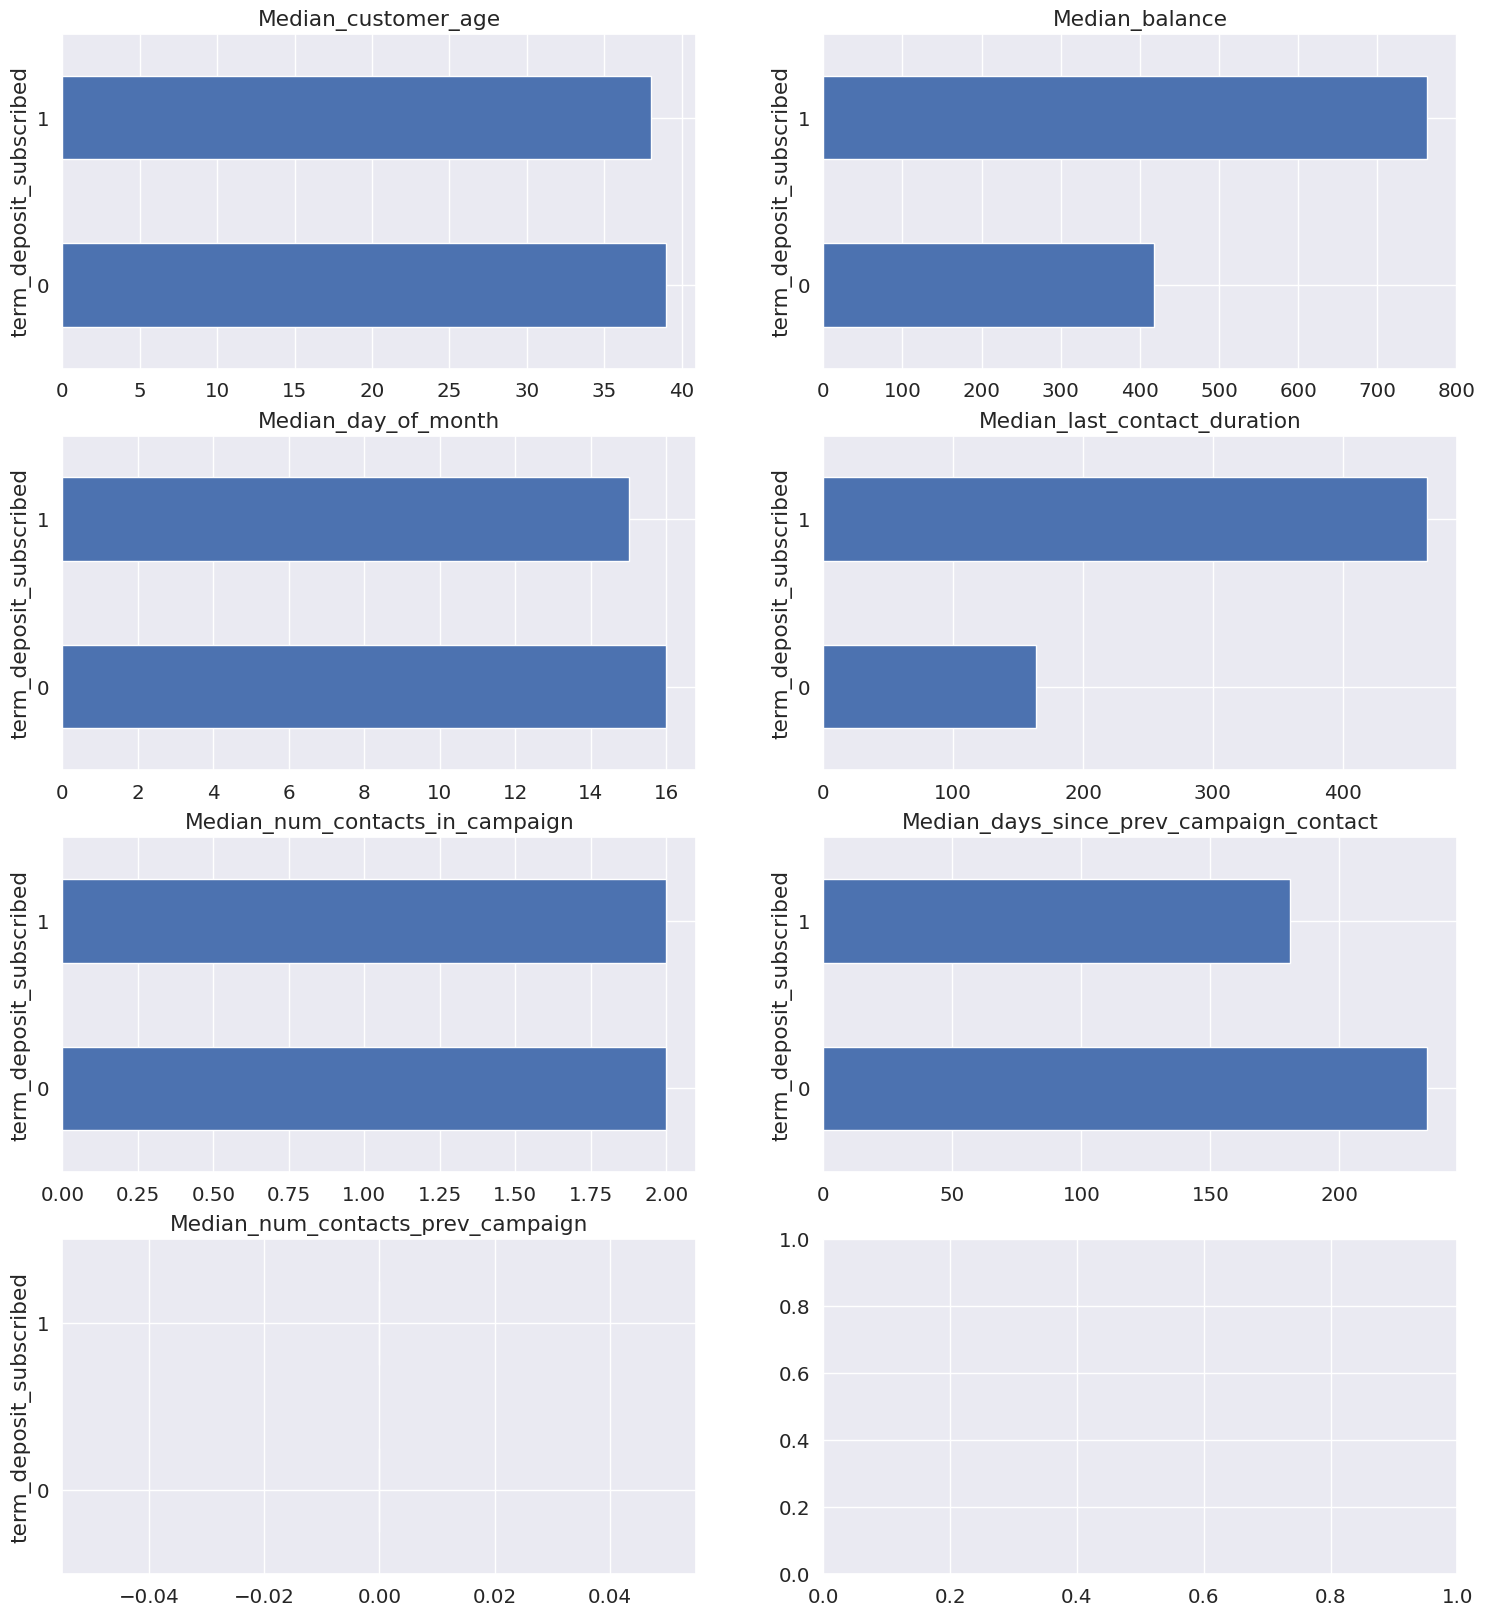

In [204]:
sns.set(font_scale = 1.3)

fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    df.groupby(target_col)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])

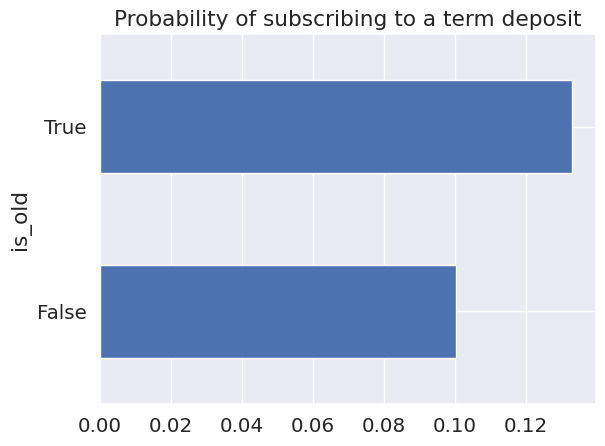

In [205]:
df['is_old'] = True

df.loc[df['customer_age'] <= 50, 'is_old'] = False

_ = df.groupby('is_old')[target_col].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df = pd.read_csv('/content/drive/MyDrive/AI/Data Analysis/marketing/car_sales_new.csv')
df.head(25)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.3+ KB


In [209]:
df.isnull().sum()

,0
car,0
price,0
body,0
mileage,0
engV,434
engType,0
registration,0
year,0
model,0
drive,511


In [210]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

,0
drive,0.053363
engV,0.045322
price,0.000000
car,0.000000
mileage,0.000000
body,0.000000
engType,0.000000
registration,0.000000
year,0.000000
model,0.000000


In [211]:
df.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [212]:
print("How many values are 0? : ", df.price[df.price == 0].count())

How many values are 0? :  267


In [213]:
print("How many values are 0? : ", df.mileage[df.mileage == 0])

How many values are 0? :  10      0
17      0
20      0
21      0
24      0
       ..
9234    0
9268    0
9382    0
9483    0
9484    0
Name: mileage, Length: 348, dtype: int64


In [214]:
df.columns = map(str.lower, df.columns)
df.dtypes

,0
car,object
price,float64
body,object
mileage,int64
engv,float64
engtype,object
registration,object
year,int64
model,object
drive,object


In [215]:
df.head(25)

,car,price,body,mileage,engv,engtype,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [216]:
df['drive'] = df['drive'].fillna("UnSpecified")
df.drive.unique()

array(['full', 'rear', 'front', 'UnSpecified'], dtype=object)

In [217]:
df['engv'].fillna((df['engv'].mean()), inplace=True)

/tmp/ipython-input-4226208166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engv'].fillna((df['engv'].mean()), inplace=True)


In [218]:
df['price'] = df['price'].replace(0, df['price'].mean())

In [219]:
mileage_avg = sum(df['mileage']) / len(df['mileage'])
df['mileage_level'] = ["high mileage" if i > mileage_avg else "low mileage" for i in df['mileage']]
df.loc[:10]

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_level
0,Ford,15500.000,crossover,68,2.500000,Gas,yes,2010,Kuga,full,low mileage
1,Mercedes-Benz,20500.000,sedan,173,1.800000,Gas,yes,2011,E-Class,rear,high mileage
2,Mercedes-Benz,35000.000,other,135,5.500000,Petrol,yes,2008,CL 550,rear,low mileage
3,Mercedes-Benz,17800.000,van,162,1.800000,Diesel,yes,2012,B 180,front,high mileage
4,Mercedes-Benz,33000.000,vagon,91,2.646344,Other,yes,2013,E-Class,UnSpecified,low mileage
5,Nissan,16600.000,crossover,83,2.000000,Petrol,yes,2013,X-Trail,full,low mileage
6,Honda,6500.000,sedan,199,2.000000,Petrol,yes,2003,Accord,front,high mileage
7,Renault,10500.000,vagon,185,1.500000,Diesel,yes,2011,Megane,front,high mileage
8,Mercedes-Benz,21500.000,sedan,146,1.800000,Gas,yes,2012,E-Class,rear,high mileage
9,Mercedes-Benz,22700.000,sedan,125,2.200000,Diesel,yes,2010,E-Class,rear,low mileage


<Axes: xlabel='year'>

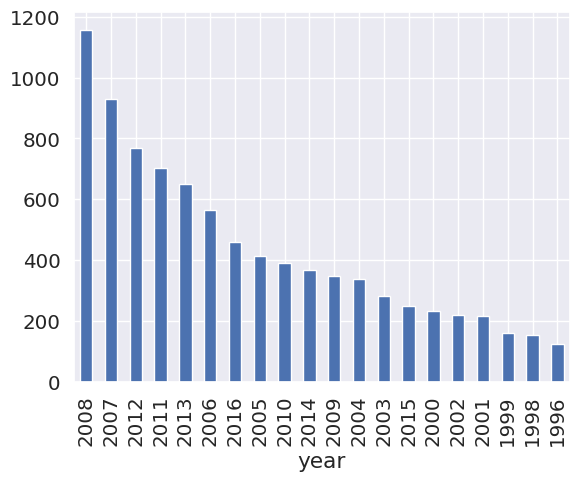

In [220]:
df['year'].value_counts().head(20).plot.bar()

<Axes: xlabel='body'>

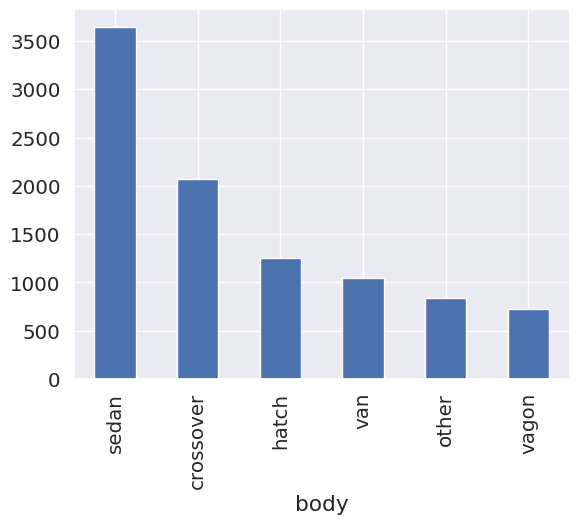

In [221]:
df['body'].value_counts().head(20).plot.bar()

<Axes: xlabel='car'>

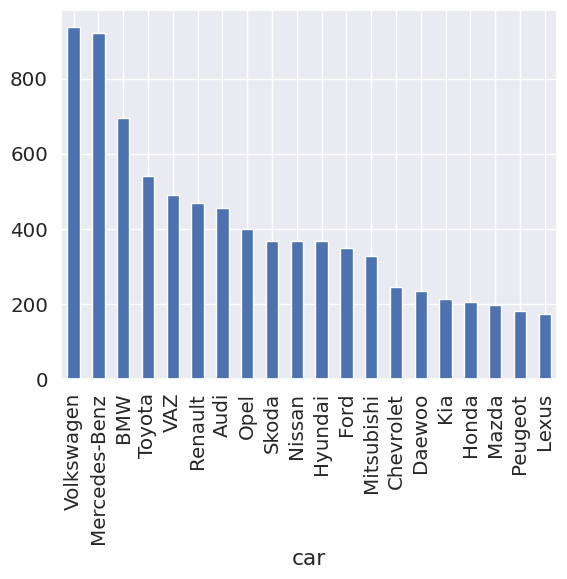

In [222]:
df['car'].value_counts().head(20).plot.bar()

/tmp/ipython-input-3369583891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_model['model'], y = top_10_model.index, palette="PuBuGn_d")


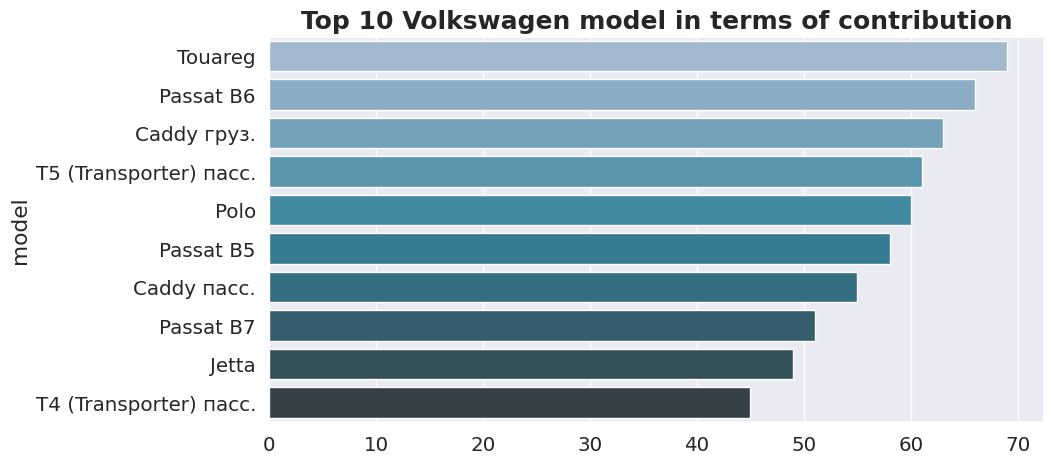

In [223]:
usa = df.loc[df['car'] == 'Volkswagen']
top_10_model = usa['model'].value_counts()[:10].to_frame('model')
plt.figure(figsize=(10,5))

sns.barplot(x = top_10_model['model'], y = top_10_model.index, palette="PuBuGn_d")
plt.title('Top 10 Volkswagen model in terms of contribution', fontsize=18, fontweight="bold")
plt.xlabel('')
plt.show()

/tmp/ipython-input-3237250006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_model['engtype'], y = top_10_model.index, palette="PuBuGn_d")


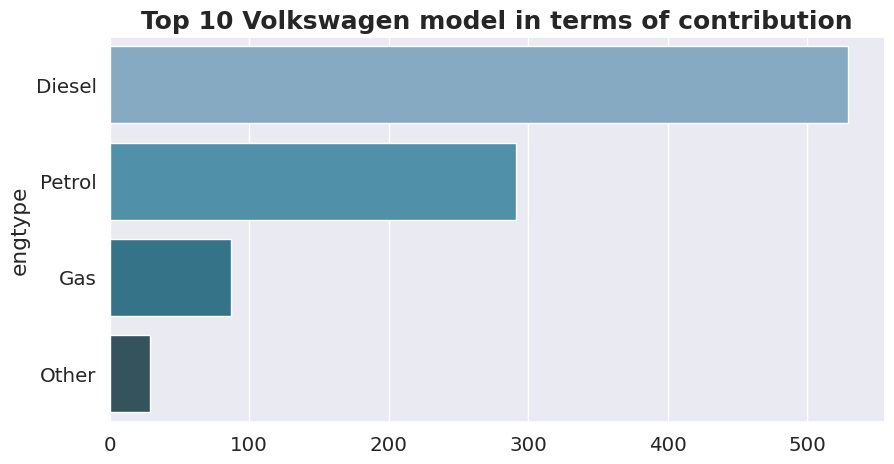

In [224]:
usa = df.loc[df['car'] == 'Volkswagen']
top_10_model = usa['engtype'].value_counts()[:10].to_frame('engtype')
plt.figure(figsize=(10,5))

sns.barplot(x = top_10_model['engtype'], y = top_10_model.index, palette="PuBuGn_d")
plt.title('Top 10 Volkswagen model in terms of contribution', fontsize=18, fontweight="bold")
plt.xlabel('')
plt.show()

/tmp/ipython-input-4020141046.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ct = pd.value_counts(df['engtype'].values, sort=False)


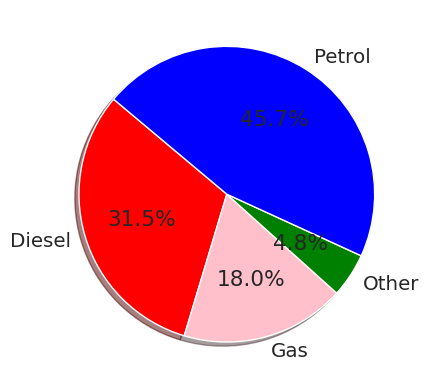

In [225]:
ct = pd.value_counts(df['engtype'].values, sort=False)
labels = df['engtype'].unique()
labels.sort()
sizes = ct
ct.sort_index(inplace=True)
colors = ['red', 'pink', 'green', 'blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.show()

<Axes: xlabel='mileage', ylabel='price'>

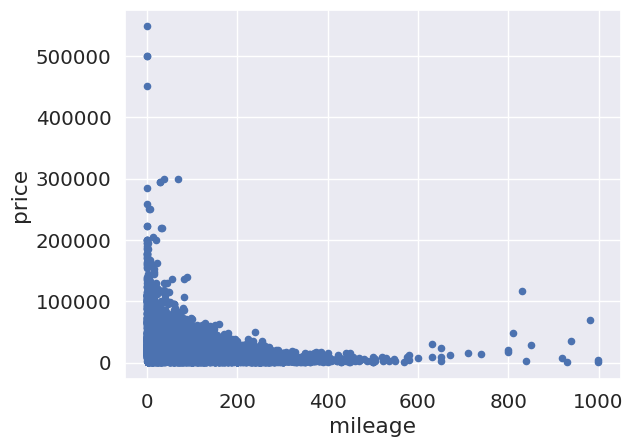

In [226]:
df.plot.scatter(x = 'mileage', y = 'price')

<Axes: xlabel='mileage', ylabel='price'>

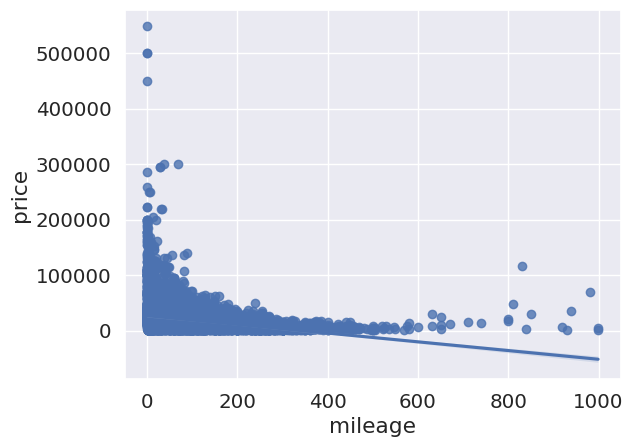

In [227]:
sns.regplot(x='mileage', y='price', data=df)

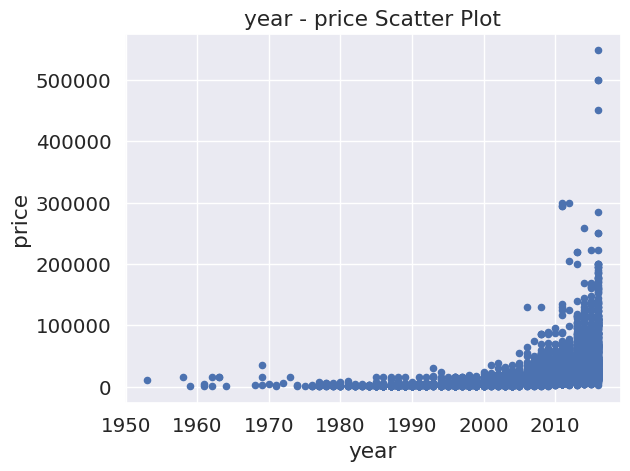

In [228]:
df.plot(kind = 'scatter', x='year', y = 'price')
plt.xlabel("year")
plt.ylabel("price")
plt.title("year - price Scatter Plot")
plt.show()

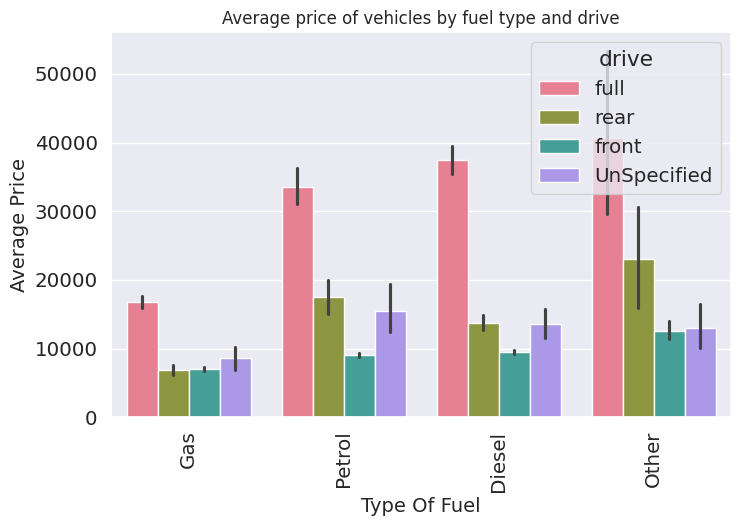

In [229]:
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x="engtype", y="price", hue= "drive", palette="husl", data=df)
ax.set_title("Average price of vehicles by fuel type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

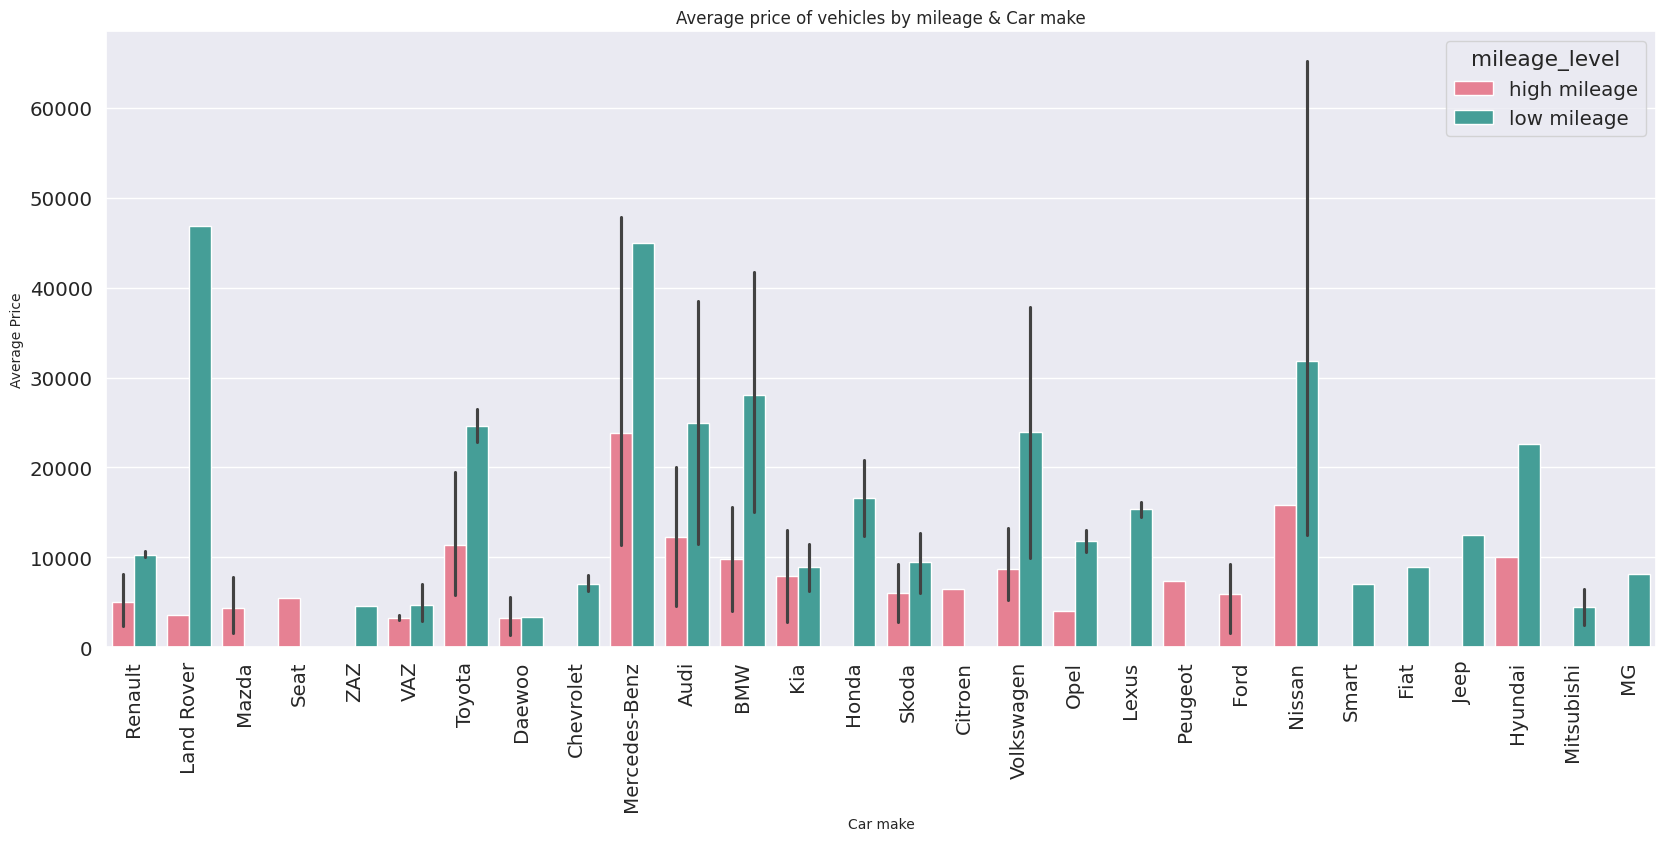

In [230]:
fig, ax = plt.subplots(figsize=(20,8))

Carsales_Sample = df.sample(100)
sns.barplot(x="car", y="price", hue= "mileage_level", palette="husl",data=Carsales_Sample)
ax.set_title("Average price of vehicles by mileage & Car make",fontdict= {'size':12})
ax.xaxis.set_label_text("Car make",fontdict= {'size':10})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':10})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

In [231]:
corr = df.loc[:, df.dtypes != 'object'].corr(method='pearson')
corr

,price,mileage,engv,year
price,1.000000,-0.323532,0.051910,0.380048
mileage,-0.323532,1.000000,0.045642,-0.495599
engv,0.051910,0.045642,1.000000,-0.040742
year,0.380048,-0.495599,-0.040742,1.000000


<Axes: >

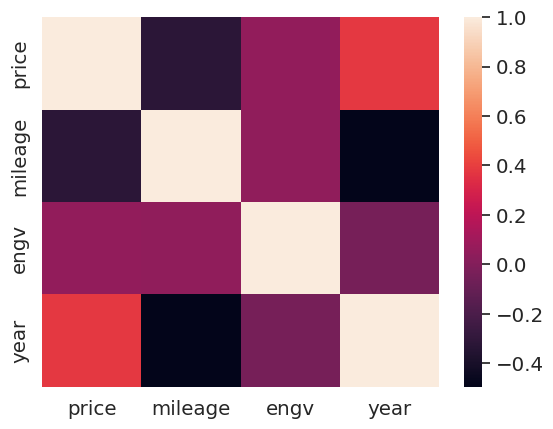

In [232]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)